In [26]:
import numpy as np
import iapws
from chemicals import iapws95_Psat, iapws95_Tsat, iapws95_rho
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# vectorize IAPWS functions
iapws_Psat = np.vectorize(iapws95_Psat)
iapws_Tsat = np.vectorize(iapws95_Tsat)
iapws_rho = np.vectorize(iapws95_rho)


In [31]:
# define pressure and temperature arrays
t = np.linspace(10, 350, 50)+273.15 # T in Kelvin
p = np.linspace(0.1,5, 50) # Pressure in MPa

# calculate difference in saturation pressure
chem = iapws_Psat(t+273.15)*1e-5

psat = []
for temp in t:
    sat_pres = iapws.iapws97._PSat_T(temp+273.15)*10
    psat.append(sat_pres)

diff_psat = psat-chem


# calculate differene in density
chem = iapws_rho(t, p*1e6)

den = []
for temp, pres in zip(t,p):
    density = iapws.iapws97.IAPWS97_PT(pres, temp).rho
    den.append(density)

diff_rho = den - chem


# calculate difference in boiling point
chem = iapws_Tsat(p*1e6)

tsat = []
for pres in p:
    sat_temp = iapws.iapws97._TSat_P(pres)
    tsat.append(sat_temp)

    
diff_tsat = tsat-chem

Text(0.5, 0, 'Difference of saturation temperature in [K]')

Text(0, 0.5, 'Input pressure in bar')

Text(0.5, 0, 'Difference of saturation pressure in [bar]')

Text(0, 0.5, 'Input temperature in [°C]')

Text(0.5, 0, 'Difference of density in [kg/m3]')

Text(0, 0.5, 'Input temperature in [°C]')

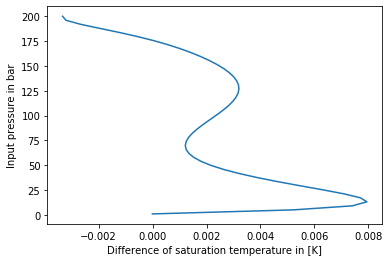

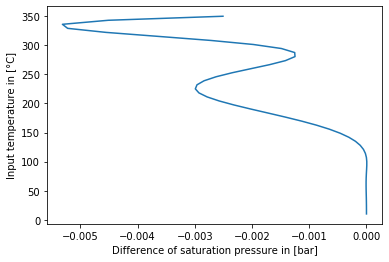

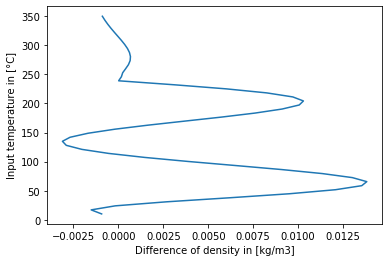

In [44]:
# plot absolute differences

fig, ax = plt.subplots()
ax.plot(diff_tsat, p*10)
ax.set_xlabel('Difference of saturation temperature in [K]') 
ax.set_ylabel('Input pressure in bar') 

fig, ax = plt.subplots()
ax.plot(diff_psat, t-273.15)
ax.set_xlabel('Difference of saturation pressure in [bar]') 
ax.set_ylabel('Input temperature in [°C]') 

fig, ax = plt.subplots()
ax.plot(diff_rho, t-273.15)
ax.set_xlabel('Difference of density in [kg/m3]') 
ax.set_ylabel('Input temperature in [°C]')

The functions below are simply some custom functions for saturation pressure and density, which were coded during the validation efforts. We do not recommend using them, but wanted to preserve them for the future.

In [43]:
def water_PSat_T_antoine(T):
    '''
    Antoine Equation
    
    T in °C, P in bar
    
    '''
    
    # turn T to np.array for vectorization
    T = np.array(T)
    
    # use different regressions for T < 100 °C
    A = np.where(T < 100, 8.07131, 8.14019)
    B = np.where(T < 100, 1730.63, 1810.94)
    C = np.where(T < 100, 233.426, 244.485)
    P = (10 ** (A - (B / (C + T)))) * 1.33322 / 1000
    
    return P



def water_PSat_T(T):
    '''
    Boiling point of pure water, taken from:
    
    Wagner W., Pruss A. (2002) The IAPWS Formulation 1995 for the Thermodynamic Properties of 
    Ordinary Water Substance for General and Scientific Use. J. Phys. Chem. Ref. Data 31, 387-535.
    
    Parameters
    ----------
    T : float
        Temperature in °C
    
    Returns
    ----------
    P : float
        Pressure in bar

    
    '''
    
    TK = np.array(T)+273.15
    
    Tcrit = 647.096
    pcrit = 22064000
    
    a1 = -7.85951783
    a2 = 1.84408259
    a3 = -11.7866497
    a4 = 22.6807411
    a5 = -15.9618719
    a6 = 1.80122502
    
    tau = 1 - TK / Tcrit
    P = pcrit * np.exp((Tcrit / TK) * (a1 * tau + a2 * tau ** 1.5 + a3 * tau ** 3 + 
                                   a4 * tau ** 3.5 + a5 * tau ** 4 + a6 * tau ** 7.5))
    P = P * 1e-5 # convert from Pa to bar

    return P


def water_rho(T):
    '''
    Density of pure water, taken from:
    
    Wagner W., Pruss A. (2002) The IAPWS Formulation 1995 for the Thermodynamic Properties of 
    Ordinary Water Substance for General and Scientific Use. J. Phys. Chem. Ref. Data 31, 387-535.
    
    Parameters
    ----------
    T : float
        Temperature in °C
    
    Returns
    ----------
    rho : float
        density in kg m-3

    
    '''

        
    T = np.array(T)+273.15


    Tcrit = 647.096
    pcrit = 22064000
    rhocrit = 322
    
    b1 = 1.99274064
    b2 = 1.09965342
    b3 = -0.510839303
    b4 = -1.75493479
    b5 = -45.5170352
    b6 = -674694.45
    
    tau = 1 - T / Tcrit
    rho = rhocrit * (1 + b1 * tau ** (1 / 3) + b2 * tau ** (2 / 3) + b3 * tau ** (5 / 3) + b4 * tau ** (16 / 3) + b5 * tau ** (43 / 3) + b6 * tau ** (110 / 3))
    
    return rho